In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# input folders
data = "/content/drive/MyDrive/297R-Caps-Pattern/Data"

In [ ]:
rank_sales = pd.read_csv(f'{data}/raw/rank_sales.csv')
# compare with bsr data
bsr = pd.read_csv(f'{data}/clean/bsr.csv')

In [ ]:
rank_sales = rank_sales.drop(columns=['Unnamed: 0']).reset_index(drop=True).drop_duplicates()

In [ ]:
print('Total ranks: ', len(rank_sales['rank']))
print('Total unique ranks:',rank_sales['rank'].nunique())
print('Total sales_estimate: ', len(rank_sales['sales_estimate']))
print('Total unique sales_estimate:',rank_sales['sales_estimate'].nunique())
print('Min ranks: {} - estimated sales: {}'.format(min(rank_sales['rank']),rank_sales[rank_sales['rank']==min(rank_sales['rank'])]['sales_estimate'].values[0]))
print('Max ranks: {} - estimated sales: {}'.format(max(rank_sales['rank']),rank_sales[rank_sales['rank']==max(rank_sales['rank'])]['sales_estimate'].values[0]))

Total ranks:  454302
Total unique ranks: 454302
Total sales_estimate:  454302
Total unique sales_estimate: 454301
Min ranks: 1 - estimated sales: 5214.0
Max ranks: 454302 - estimated sales: 0.0500019810589775


In [ ]:
rank_sales

,rank,sales_estimate
0,1,5214.000000
1,2,4634.000000
2,3,4290.000000
3,4,4046.000000
4,5,3856.000000
...,...,...
454297,454298,0.050010
454298,454299,0.050008
454299,454300,0.050006
454300,454301,0.050004


Text(0.5, 1.0, 'rank vs sales_estimate')

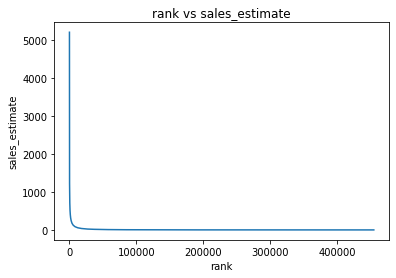

In [ ]:
# plot rank vs sales_estimate
plt.plot(rank_sales['rank'], rank_sales['sales_estimate'])
plt.xlabel('rank')
plt.ylabel('sales_estimate')
plt.title('rank vs sales_estimate')

Text(0.5, 1.0, 'rank vs sales_estimate')

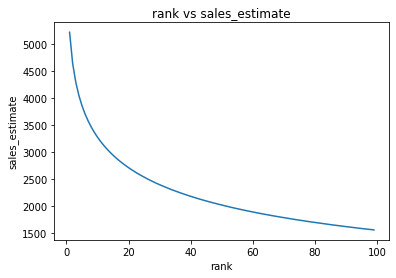

In [ ]:
# plot rank vs sales_estimate
rank_sales_temp = rank_sales[rank_sales['rank'] < 100]
plt.plot(rank_sales_temp['rank'], rank_sales_temp['sales_estimate'])
plt.xlabel('rank')
plt.ylabel('sales_estimate')
plt.title('rank vs sales_estimate')

In [ ]:
x = np.array([454302, 5568282]).reshape((-1, 1))
y = np.array([0.050002, 0])
model = LinearRegression().fit(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.05444394318397803
slope: [-9.77751184e-09]


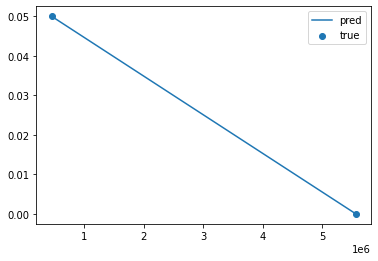

In [ ]:
plt.plot(x, model.predict(x),label='pred')
plt.scatter(x, y, label='true')
plt.legend()

In [ ]:
missing_rank = np.array([i for i in range(454303, 5568283)]).reshape(-1, 1)
pred_sales = model.predict(missing_rank)
missing_rank_df = pd.DataFrame({'rank': missing_rank.reshape(-1), 'sales_estimate': pred_sales})

In [ ]:
full_rank_sales = pd.concat([rank_sales, missing_rank_df])

In [ ]:
print('Total ranks: ', len(full_rank_sales['rank']))
print('Total unique ranks:',full_rank_sales['rank'].nunique())
print('Total sales_estimate: ', len(full_rank_sales['sales_estimate']))
print('Total unique sales_estimate:',full_rank_sales['sales_estimate'].nunique())
print('Min ranks: {} - estimated sales: {}'.format(min(full_rank_sales['rank']),full_rank_sales[full_rank_sales['rank']==min(full_rank_sales['rank'])]['sales_estimate'].values[0]))
print('Max ranks: {} - estimated sales: {}'.format(max(full_rank_sales['rank']),full_rank_sales[full_rank_sales['rank']==max(full_rank_sales['rank'])]['sales_estimate'].values[0]))

Total ranks:  5568282
Total unique ranks: 5568282
Total sales_estimate:  5568282
Total unique sales_estimate: 5568281
Min ranks: 1 - estimated sales: 5214.0
Max ranks: 5568282 - estimated sales: 6.938893903907228e-18


In [ ]:
print('Max rank in the bsr dataset is:', max(bsr['rank']))
print('Max rank in the rank-sales dataset is :', max(full_rank_sales['rank']))
print('Min rank in the bsr dataset is:', min(bsr['rank']))
print('Min rank in the rank-sales dataset is :', min(full_rank_sales['rank']))

Max rank in the bsr dataset is: 5568282.0
Max rank in the rank-sales dataset is : 5568282
Min rank in the bsr dataset is: 1.0
Min rank in the rank-sales dataset is : 1


In [ ]:
full_rank_sales

,rank,sales_estimate
0,1,5.214000e+03
1,2,4.634000e+03
2,3,4.290000e+03
3,4,4.046000e+03
4,5,3.856000e+03
...,...,...
5113975,5568278,3.911005e-08
5113976,5568279,2.933254e-08
5113977,5568280,1.955502e-08
5113978,5568281,9.777512e-09


In [ ]:
# save to 
full_rank_sales.to_csv(f'{data}/clean/full_rank_sales.csv', index=False)